# 5. Frequency Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)
5. [Ejercicios](#ejercicios)
    1. [Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)](#a)
    1. [Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)](#b)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/VISION COMPUTACIONAL'
os.chdir(DATA_PATH)

Mounted at /content/drive


## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

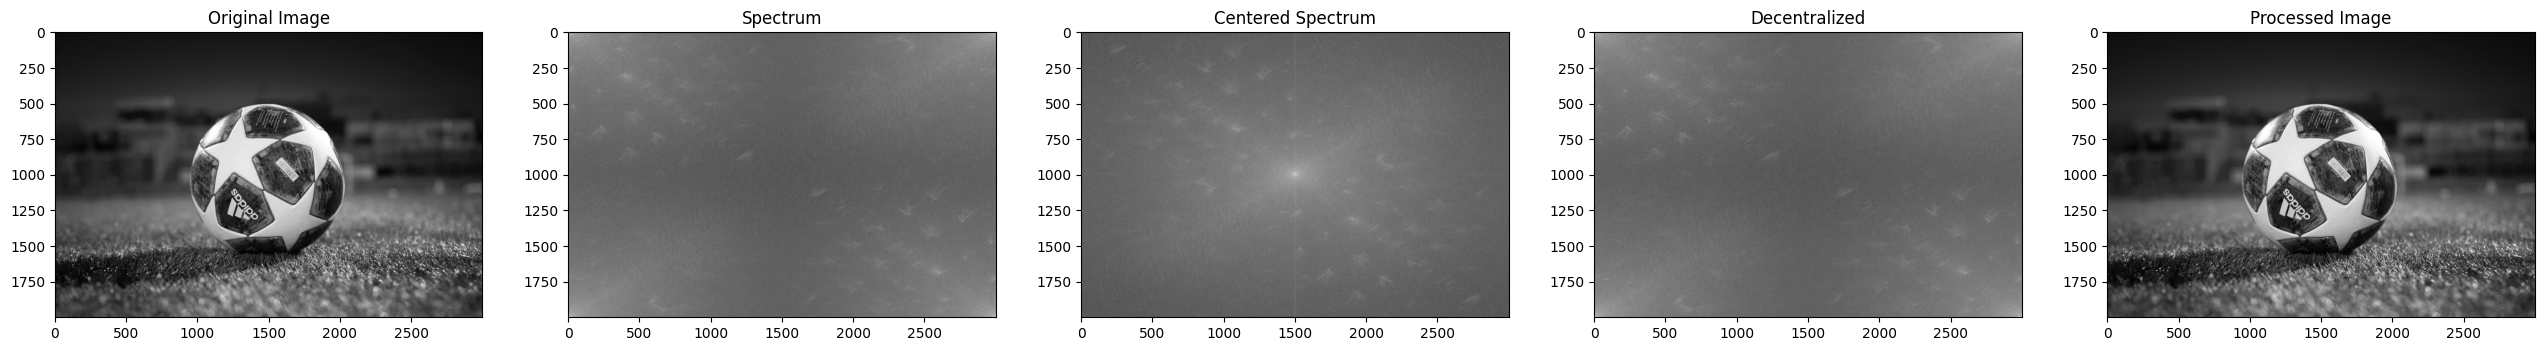

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/futbol.jpeg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()


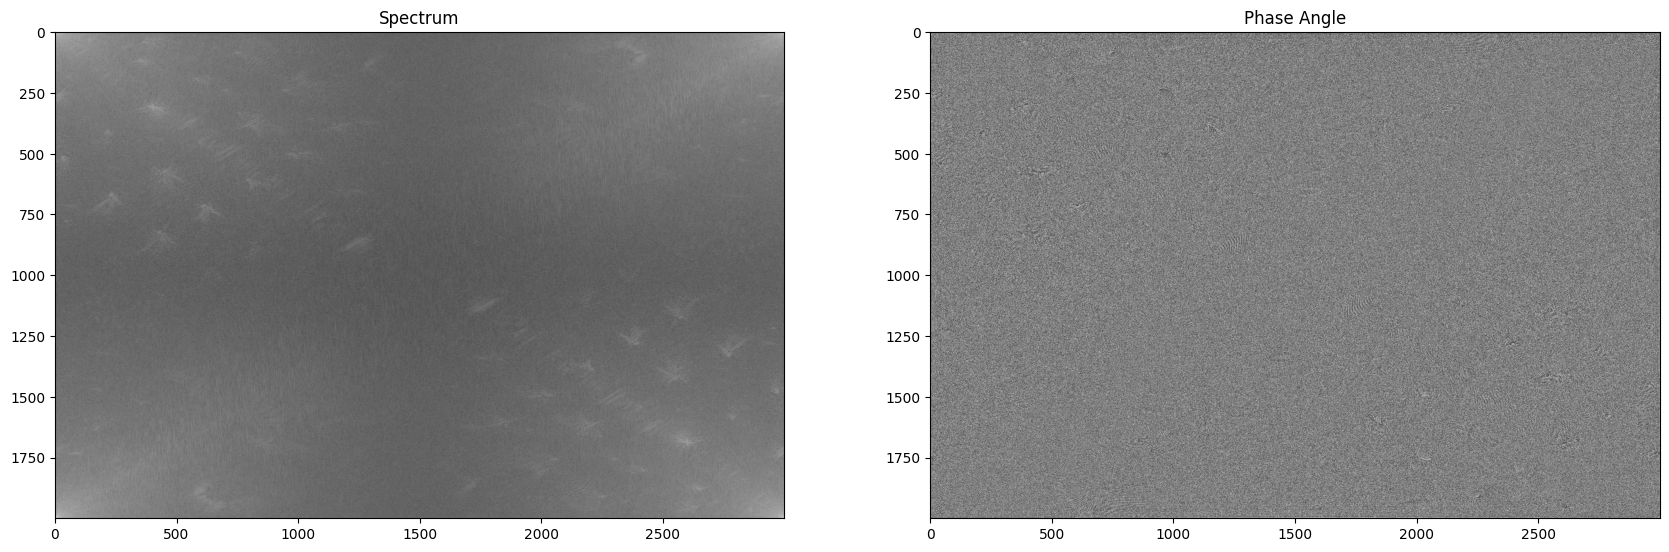

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/futbol.jpeg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

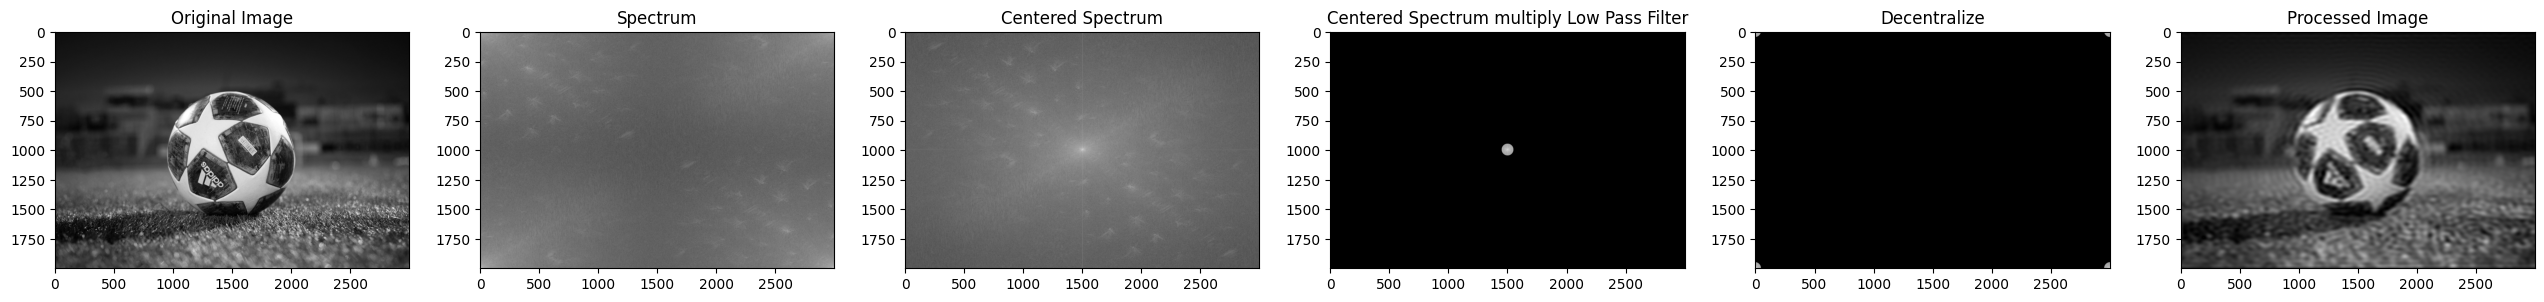

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/futbol.jpeg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

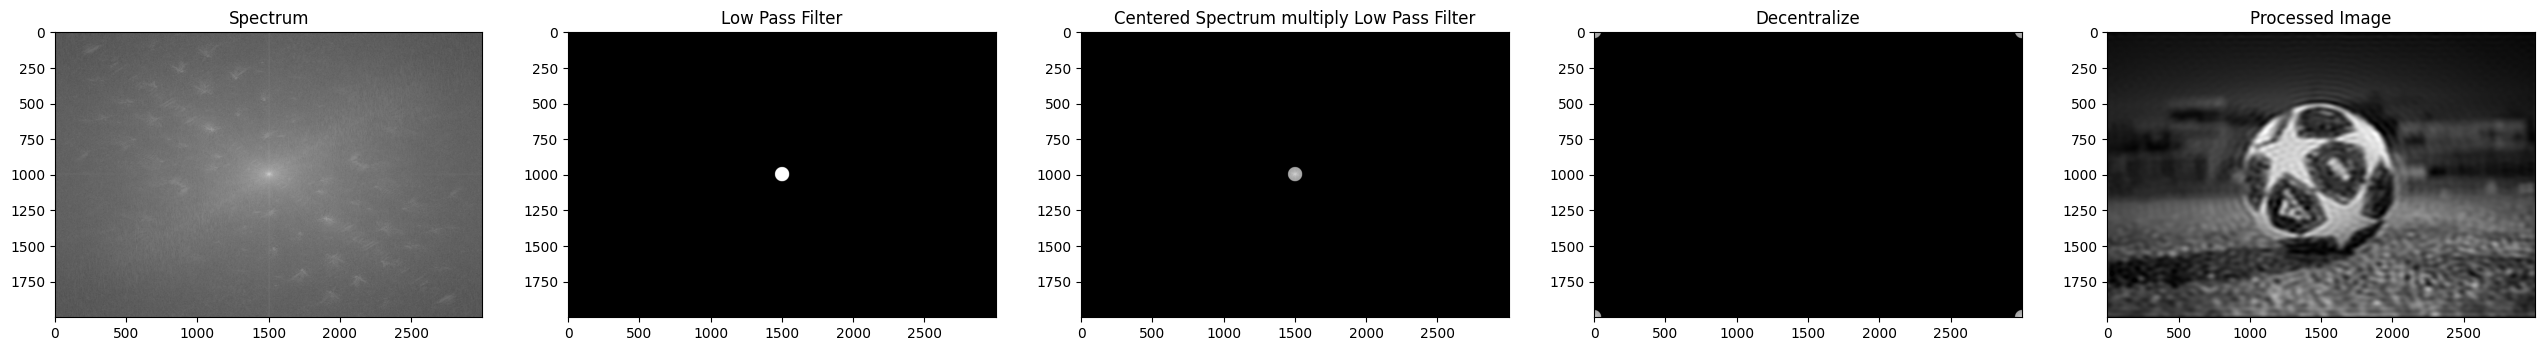

In [ ]:
img = cv2.imread("data/futbol.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

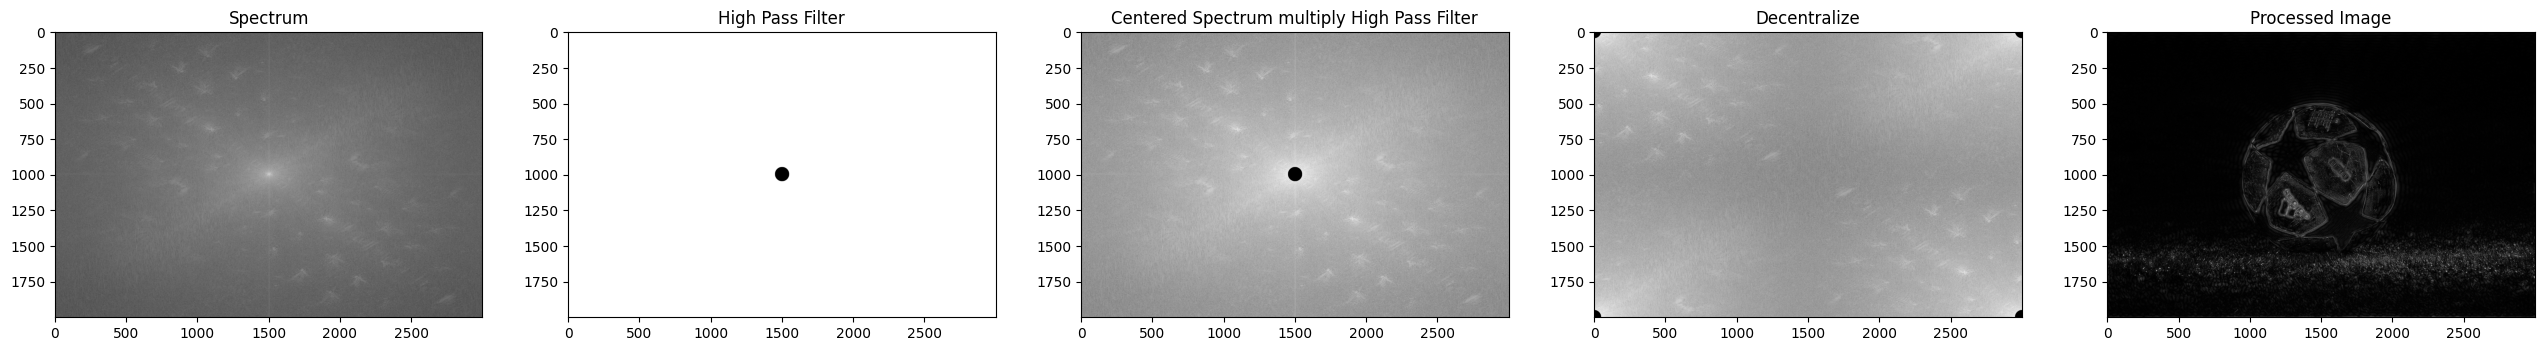

In [ ]:
img = cv2.imread("data/futbol.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

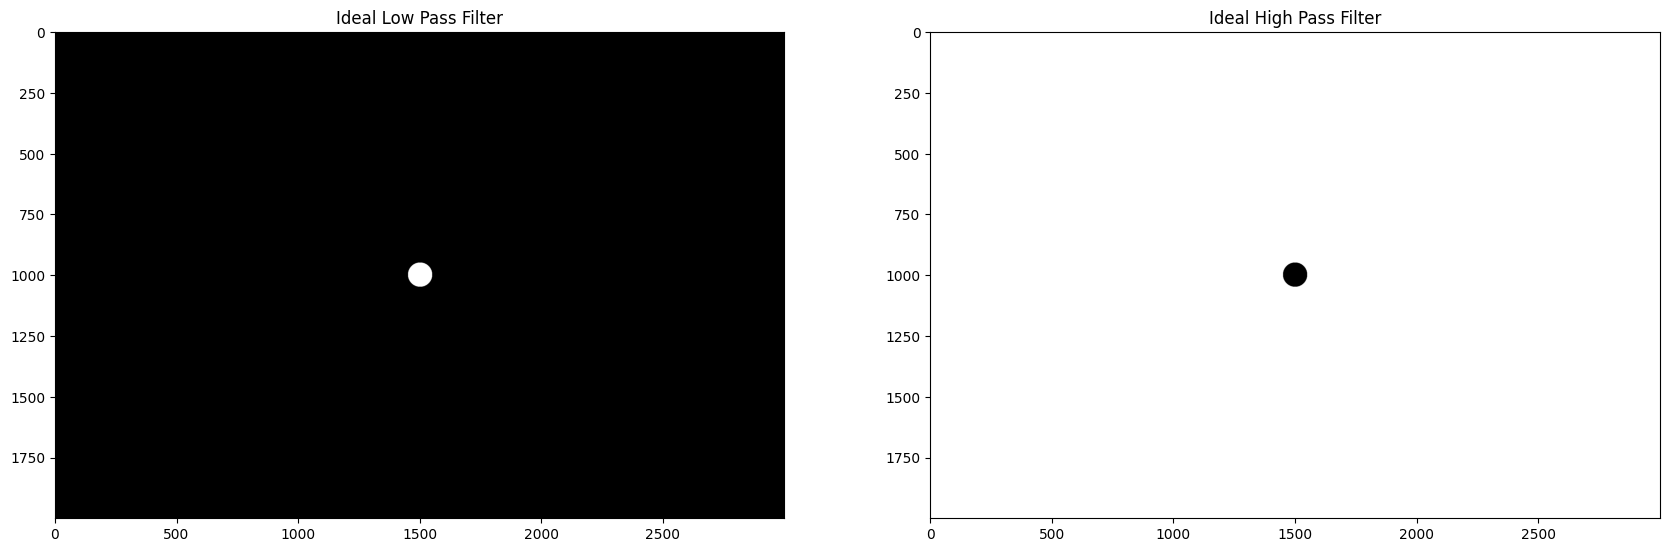

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

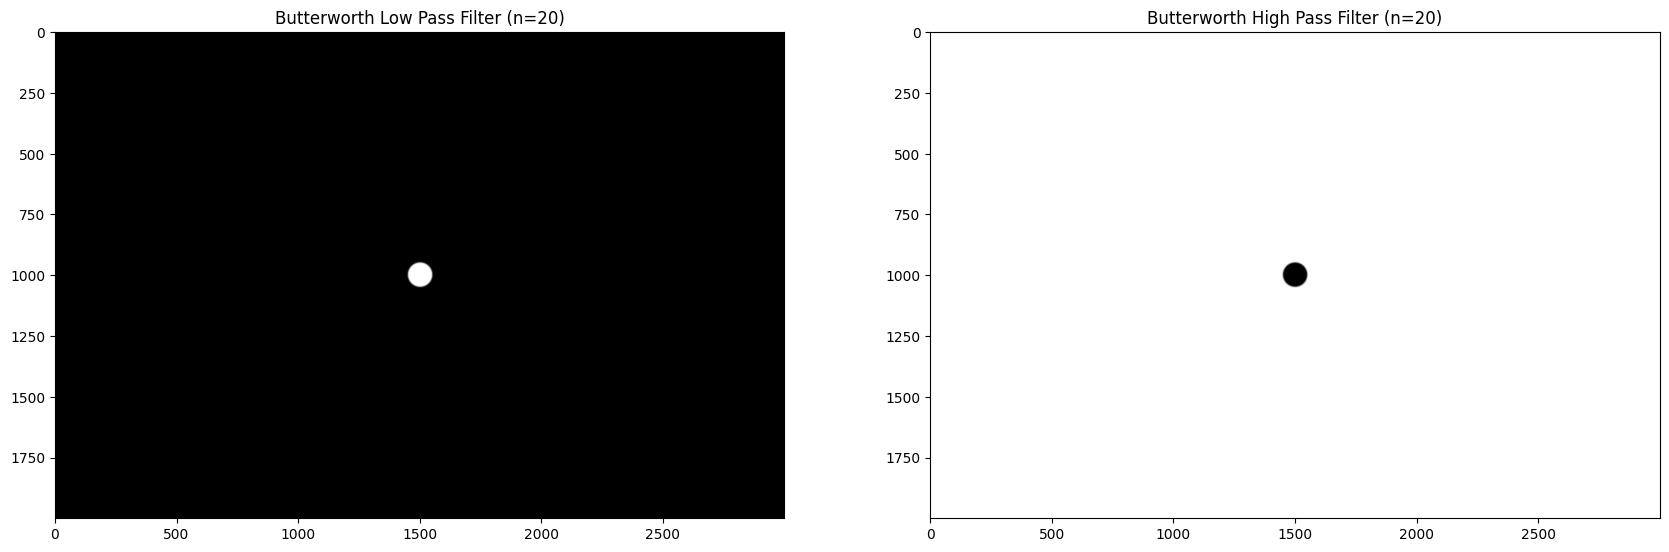

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

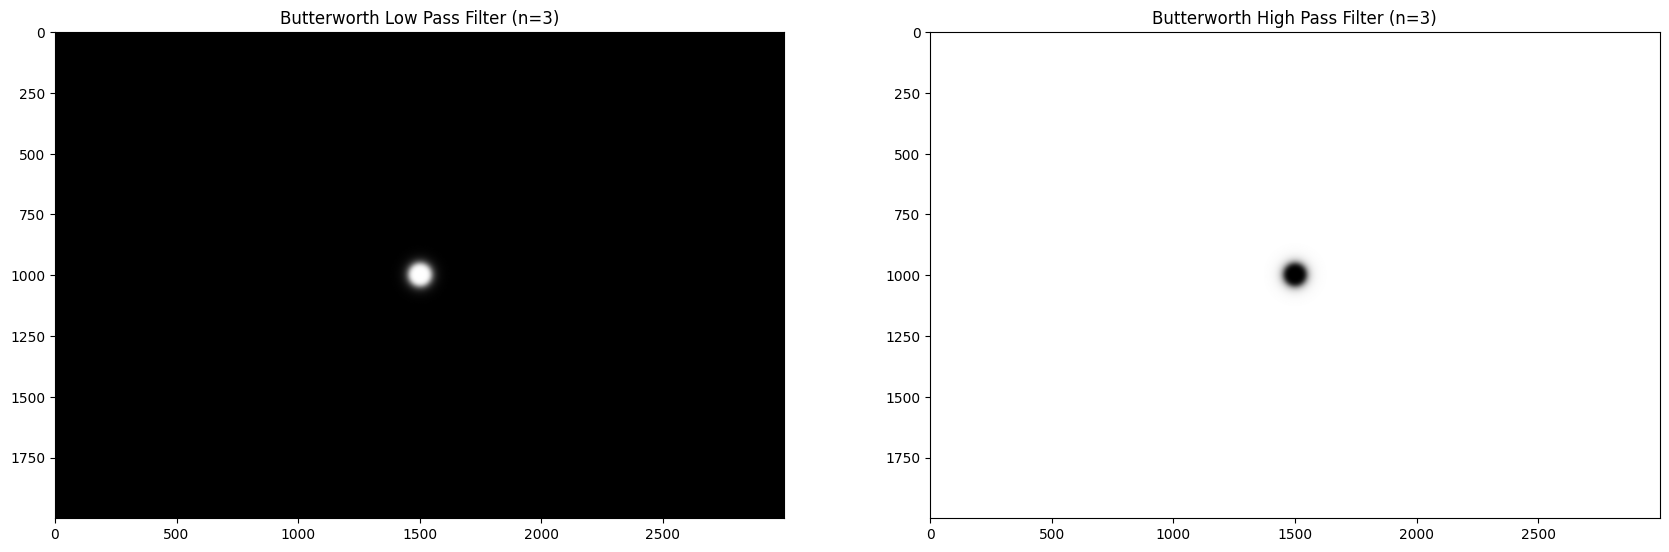

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

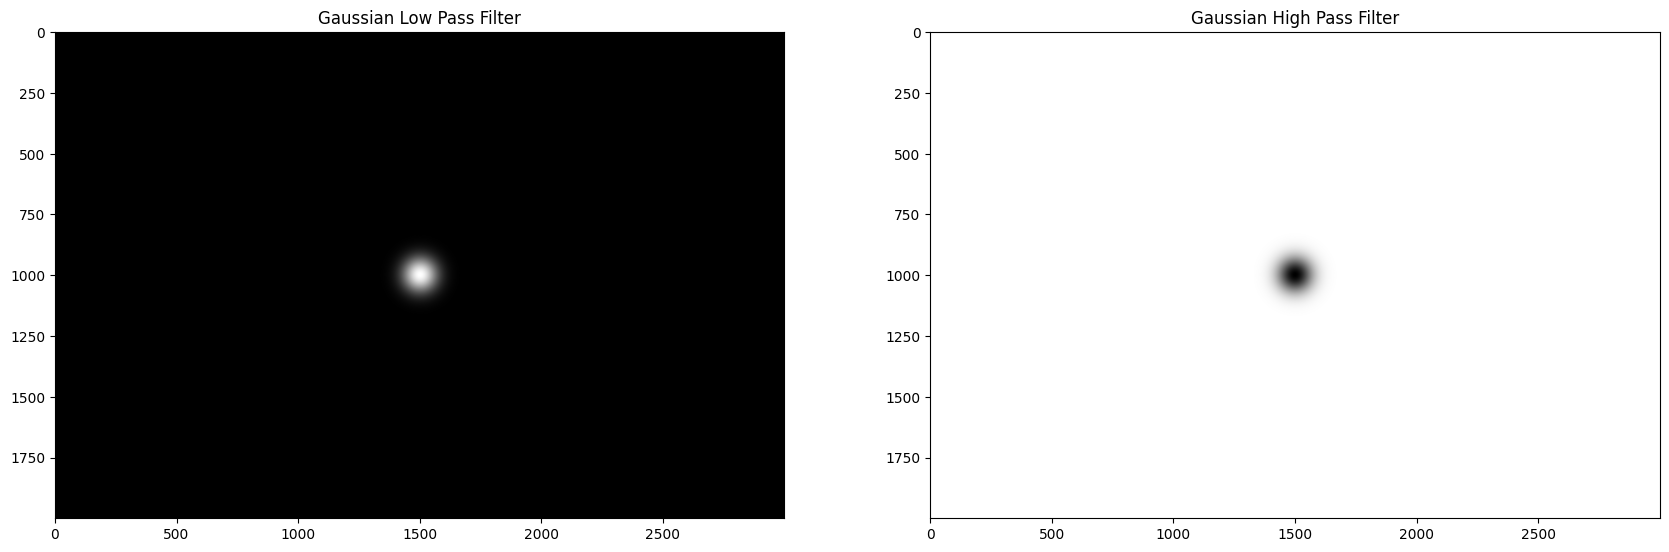

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

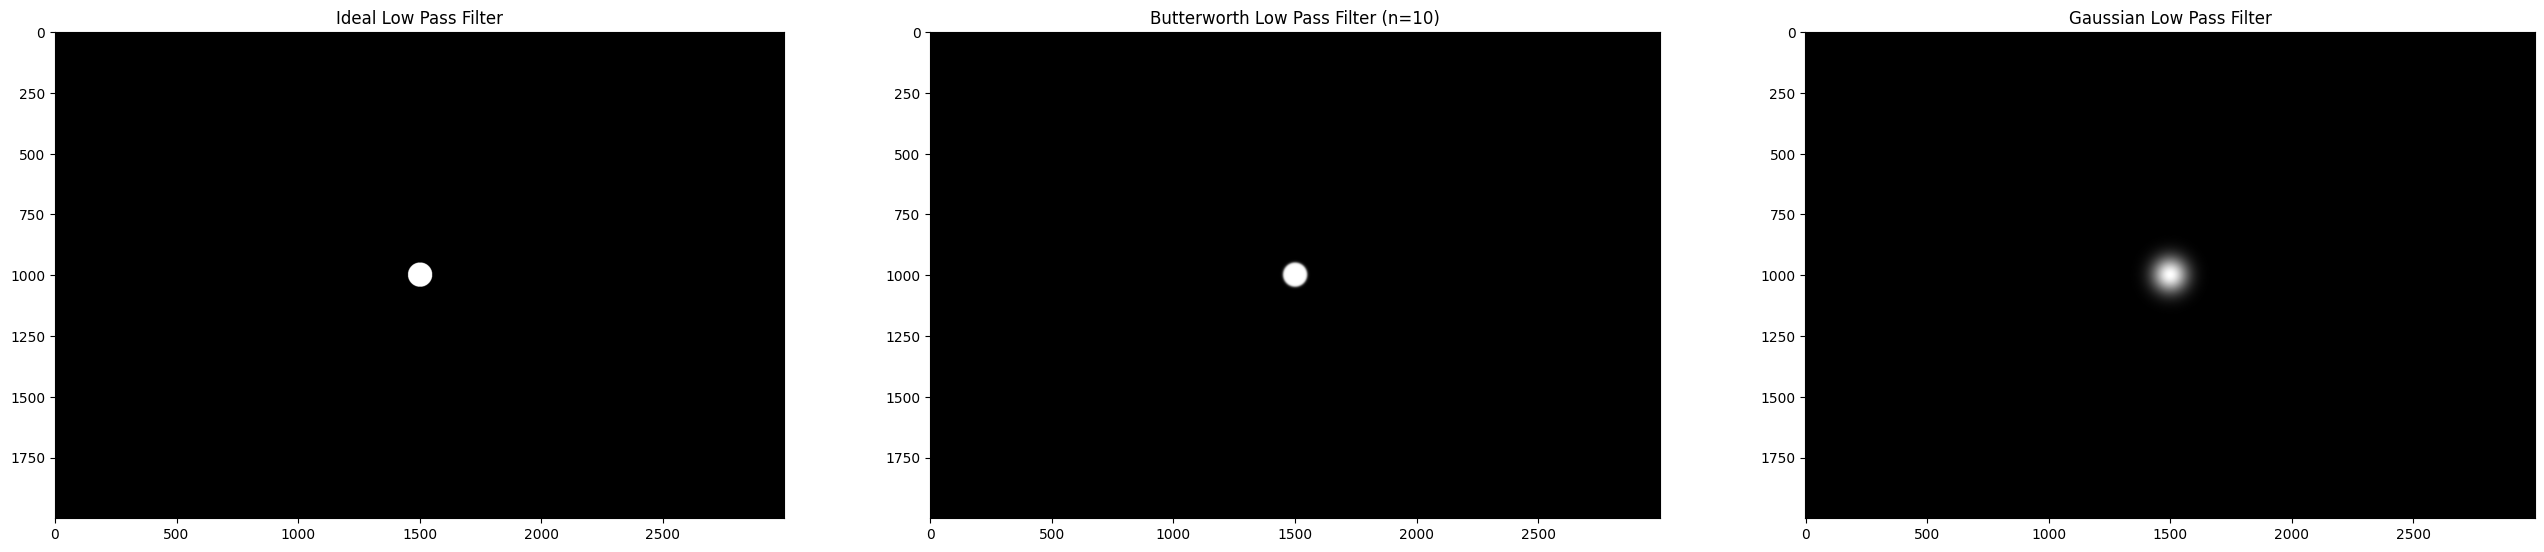

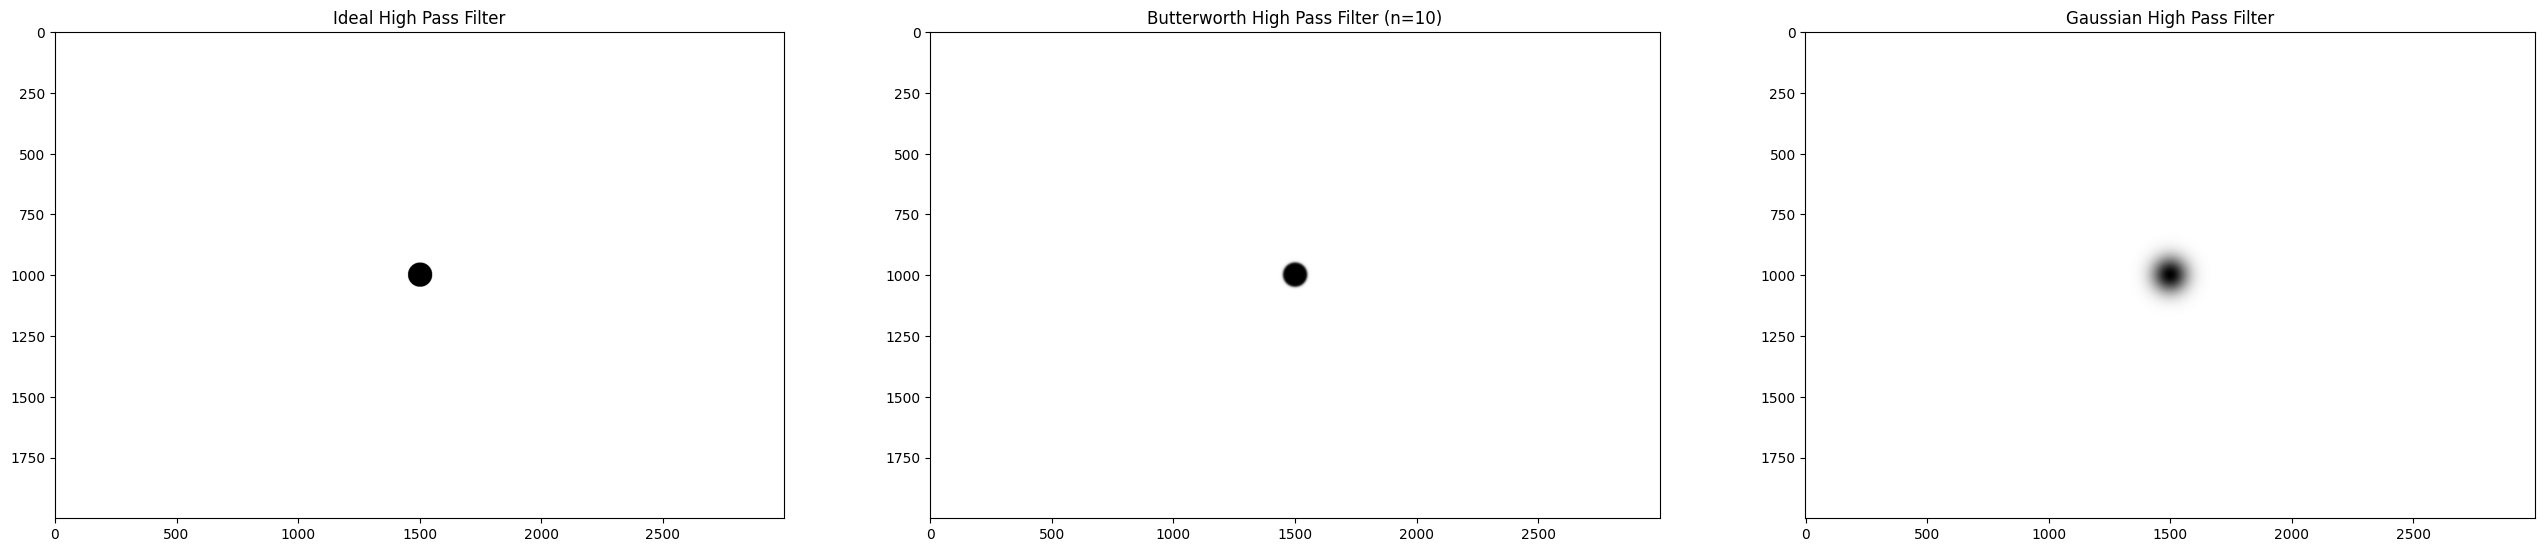

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

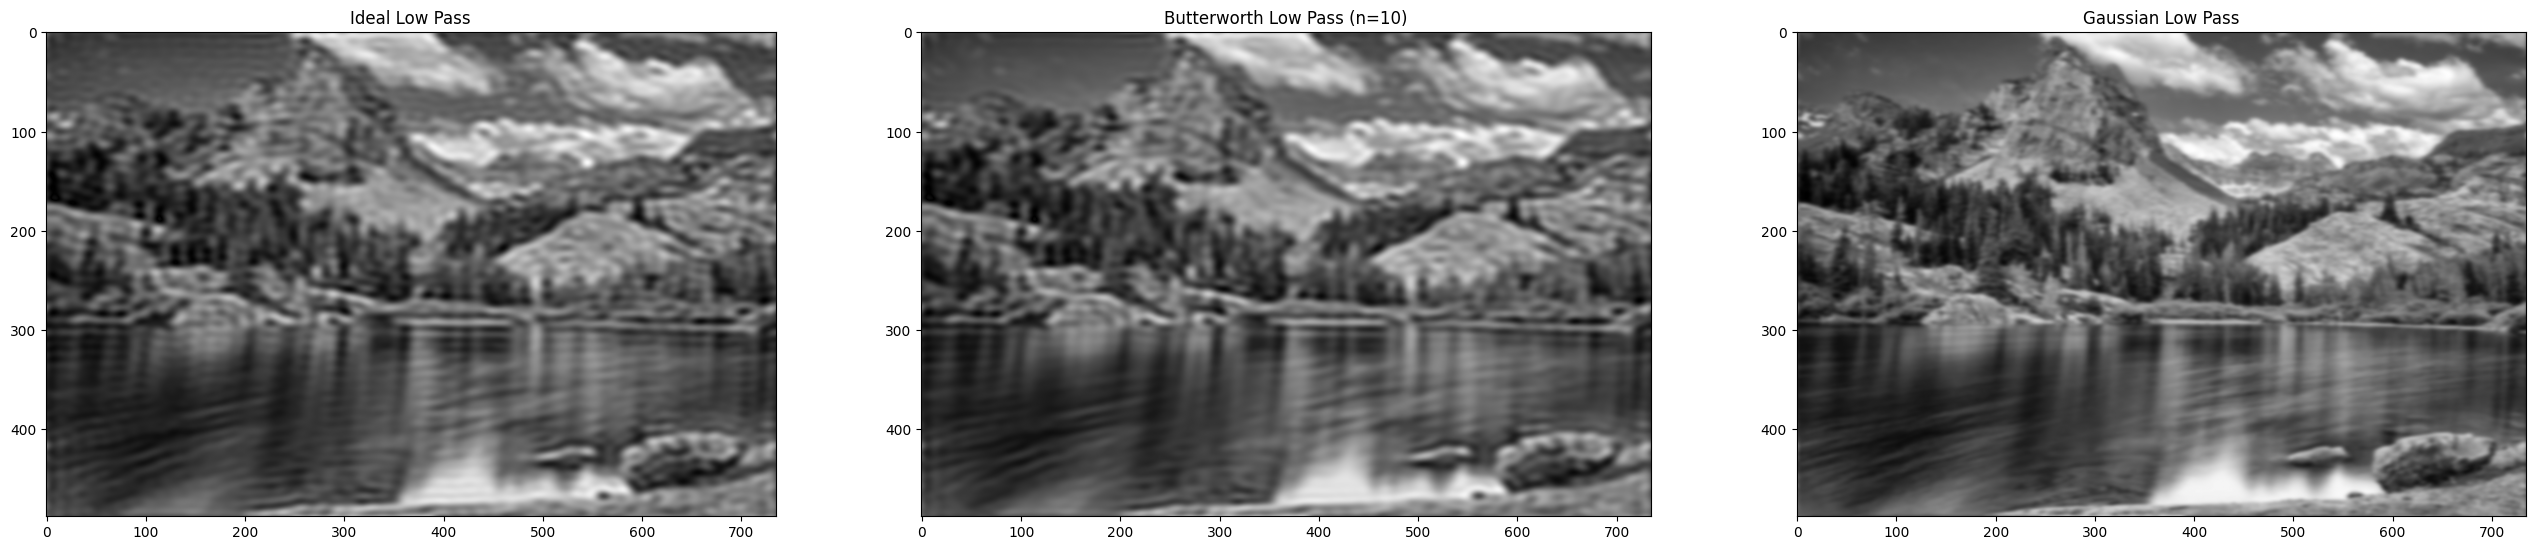

In [ ]:
img = cv2.imread("data/paisaje.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

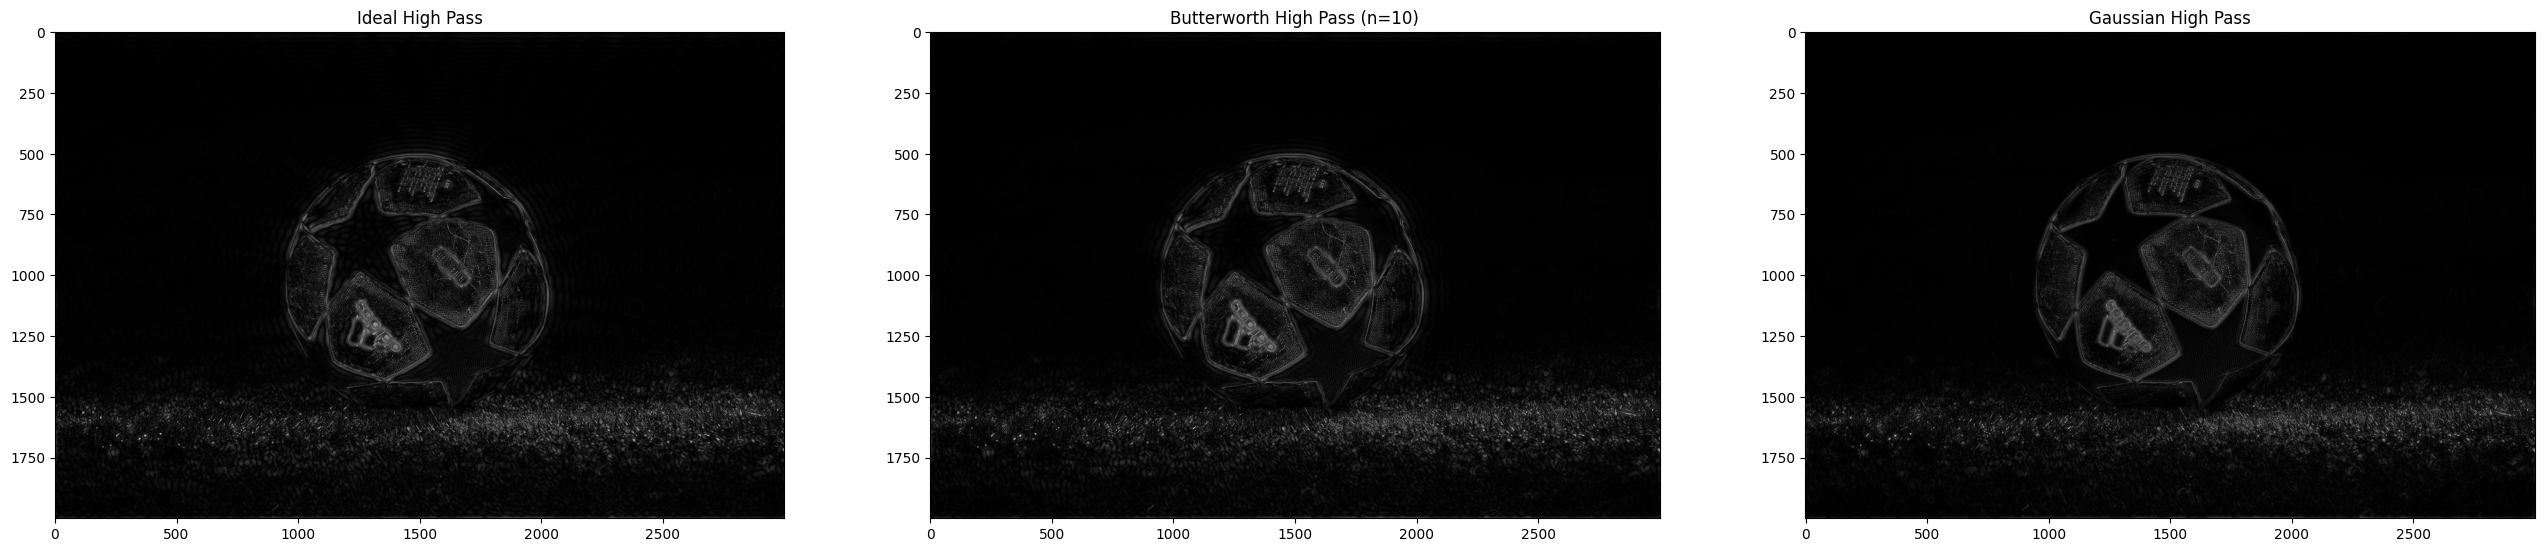

In [ ]:
img = cv2.imread("data/futbol.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

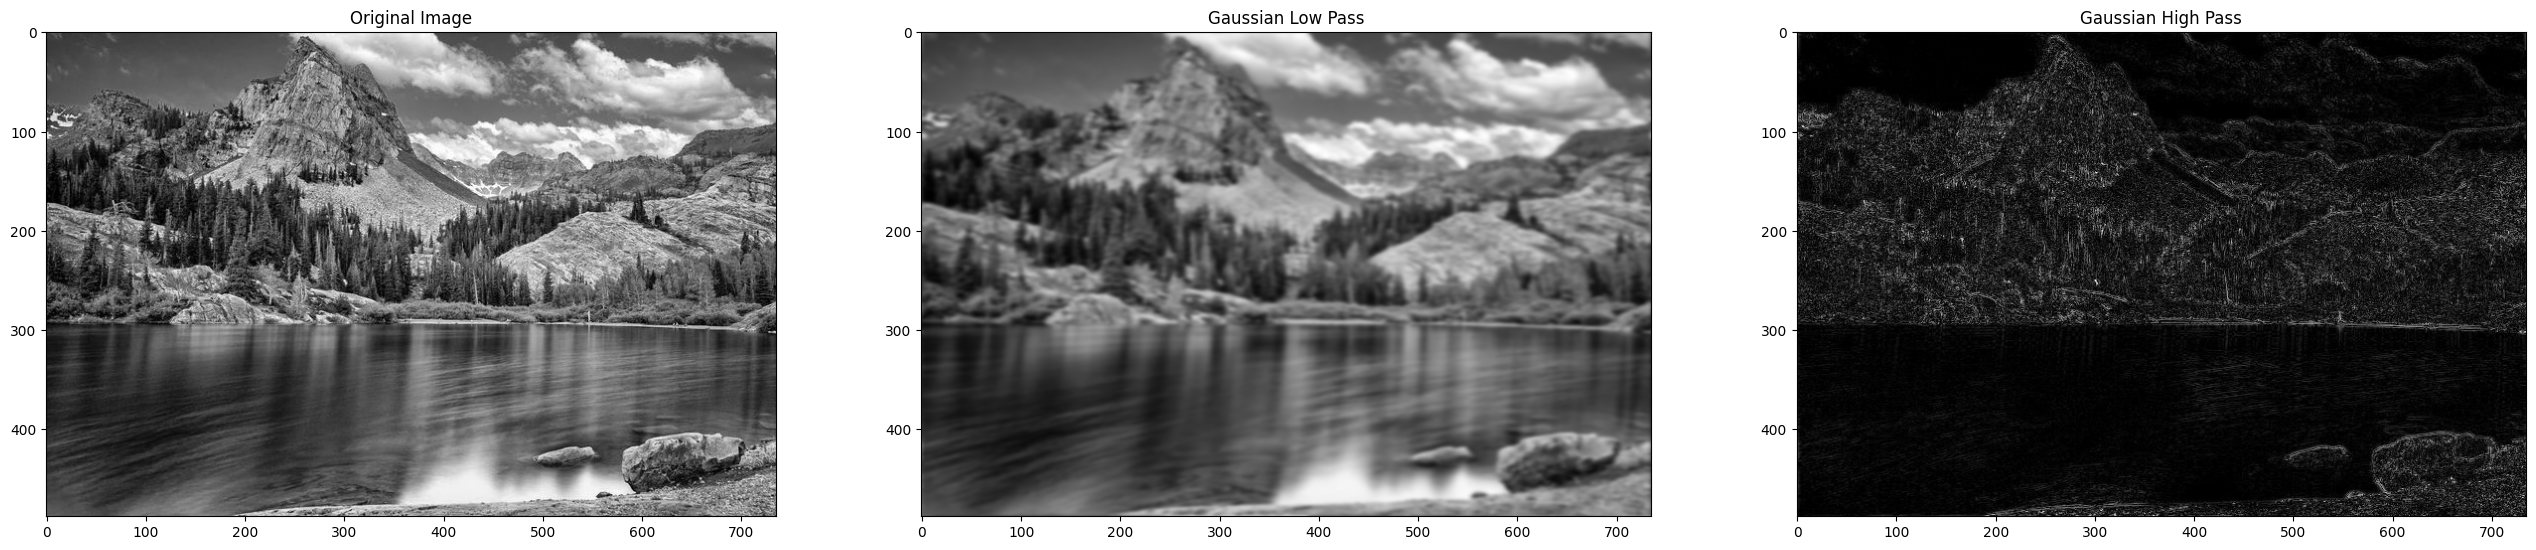

In [ ]:
img = cv2.imread("data/paisaje.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# Ejercicios <a class="anchor" id="ejercicios" ></a>

#### a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,) <a class="anchor" id="a" ></a>

#### **Difuminación de Dobleces en Fotografías Antiguas con Filtros Pasabajas**

Las fotos antiguas suelen tener **dobleces visibles**, que aparecen como **líneas marcadas de alta frecuencia** en la imagen. Estas líneas pueden distraer y dificultar la restauración.  

#### **¿Cómo ayuda el método?**
La **Transformada de Fourier (FFT)** nos permite analizar la imagen en el **dominio de frecuencia**, donde los dobleces aparecen como componentes de alta frecuencia. Aplicamos **filtros pasabajas** para reducir estas frecuencias y suavizar los defectos.  

#### **Proceso de eliminación de dobleces**
1️⃣ **FFT**: Convierte la imagen al dominio de frecuencia, identificando los dobleces como detalles de alta frecuencia.  
2️⃣ **Filtro Pasabajas**: Atenúa las altas frecuencias, reduciendo la visibilidad de los dobleces.  
3️⃣ **Transformada Inversa (IFFT)**: Recupera la imagen filtrada, con los dobleces suavizados.  

#### **Filtros aplicados**
- **Ideal Low Pass**: Elimina bruscamente las frecuencias altas, pero puede borrar detalles.  
- **Butterworth Low Pass**: Suaviza la transición entre bajas y altas frecuencias.  
- **Gaussian Low Pass**: Reduce progresivamente las altas frecuencias, manteniendo más detalles.   

#### **Conclusión**
Este método es una herramienta efectiva para **difuminar dobleces en fotos antiguas**, logrando un balance entre **suavizado y conservación de detalles**.  

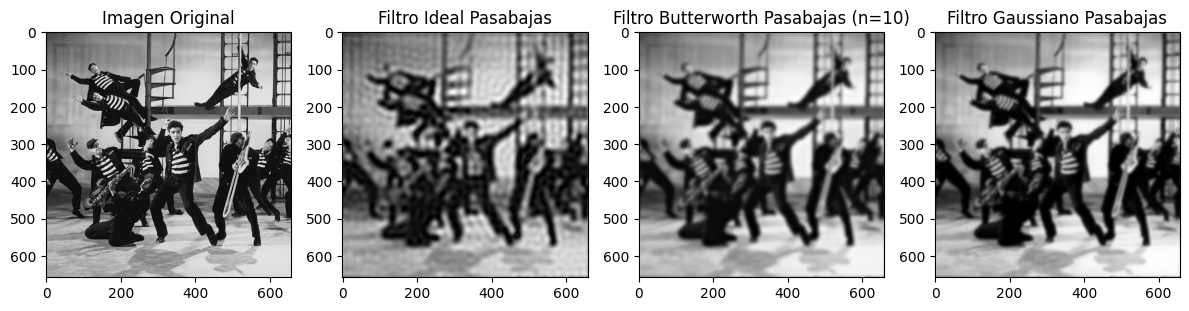

In [ ]:
# Función para aplicar la transformada de Fourier
def fft2_shift(img):
    return np.fft.fftshift(np.fft.fft2(img))

# Función para aplicar la transformada inversa de Fourier
def ifft2_shift(f_img):
    return np.fft.ifft2(np.fft.ifftshift(f_img))

# Filtro ideal pasabajas
def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_ideal = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_x)**2 + (j - center_y)**2) <= cutoff:
                filter_ideal[i, j] = 1
    return filter_ideal

# Filtro Butterworth pasabajas
def butterworth_low_pass_filter(shape, cutoff, order=2):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_butterworth = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - center_x)**2 + (j - center_y)**2)
            filter_butterworth[i, j] = 1 / (1 + (d / cutoff)**(2 * order))
    return filter_butterworth

# Filtro Gaussiano pasabajas
def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_gaussian = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - center_x)**2 + (j - center_y)**2)
            filter_gaussian[i, j] = np.exp(-(d**2) / (2 * (cutoff**2)))
    return filter_gaussian

# Cargar la imagen y convertirla en escala de grises
img = cv2.imread("data/jail.jpg", 0)

# Aplicar la FFT y obtener el espectro
original_fft = fft2_shift(img)

# Parámetros
cutoff = 30  # Radio de corte del filtro pasabajas
order = 2     # Orden para el filtro Butterworth

# Aplicar los filtros
ideal_filter = ideal_low_pass_filter(img.shape, cutoff)
butterworth_filter = butterworth_low_pass_filter(img.shape, cutoff, order)
gaussian_filter = gaussian_low_pass_filter(img.shape, cutoff)

# Filtrar la imagen en el dominio de frecuencia
ideal_filtered = ifft2_shift(original_fft * ideal_filter)
butterworth_filtered = ifft2_shift(original_fft * butterworth_filter)
gaussian_filtered = ifft2_shift(original_fft * gaussian_filter)

# Mostrar los resultados
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title("Imagen Original")

# Ideal Low-Pass Filtered Image
plt.subplot(142), plt.imshow(np.abs(ideal_filtered), cmap='gray'), plt.title("Filtro Ideal Pasabajas")

# Butterworth Low-Pass Filtered Image
plt.subplot(143), plt.imshow(np.abs(butterworth_filtered), cmap='gray'), plt.title("Filtro Butterworth Pasabajas (n=10)")

# Gaussian Low-Pass Filtered Image
plt.subplot(144), plt.imshow(np.abs(gaussian_filtered), cmap='gray'), plt.title("Filtro Gaussiano Pasabajas")
plt.tight_layout()
plt.show()


#### b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,) <a class="anchor" id="b" ></a>

#### Mejoramiento de Huellas Dactilares para Biometría con Filtros Pasa Altas
Las huellas dactilares son ampliamente utilizadas en sistemas biométricos para la identificación y autenticación de personas. Sin embargo, en muchas ocasiones, las imágenes de huellas pueden presentar problemas como desenfoque o ruido, lo que afecta la precisión de los algoritmos de reconocimiento. Para mejorar la calidad de estas imágenes, se pueden aplicar técnicas basadas en la Transformada de Fourier (FFT) junto con filtros pasa altas.

**¿Cómo ayuda la Transformada de Fourier?**

La FFT permite transformar la imagen al dominio de la frecuencia, donde las estructuras detalladas de las huellas aparecen como componentes de alta frecuencia. Al aplicar filtros pasa altas, se pueden resaltar los bordes y líneas características de las huellas, lo que facilita su análisis y procesamiento.

**Proceso de mejoramiento de huellas dactilares**

1️⃣ Transformada de Fourier (FFT): Convierte la imagen al dominio de la frecuencia, identificando los detalles de la huella en términos de frecuencias.

2️⃣ Aplicación de Filtros Pasa Altas: Se eliminan las bajas frecuencias y se enfatizan las altas, mejorando el contraste de las crestas de la huella.

3️⃣ Transformada Inversa (IFFT): Se regresa la imagen al dominio espacial con las mejoras aplicadas.

**Tipos de filtros utilizados**

Ideal High Pass: Elimina las bajas frecuencias de forma brusca, resaltando bordes pero generando efectos no deseados como artefactos.

Butterworth High Pass: Suaviza la transición entre bajas y altas frecuencias, evitando la distorsión abrupta.

Gaussian High Pass: Reduce progresivamente las bajas frecuencias, manteniendo detalles clave sin introducir artefactos.

**Conclusión**

El uso de filtros pasa altas junto con la transformada de Fourier permite mejorar la nitidez de las huellas dactilares, resaltando detalles esenciales para los sistemas biométricos. Esta técnica es útil en aplicaciones de reconocimiento de identidad, seguridad forense y sistemas de control de acceso, mejorando la precisión en la identificación de individuos.

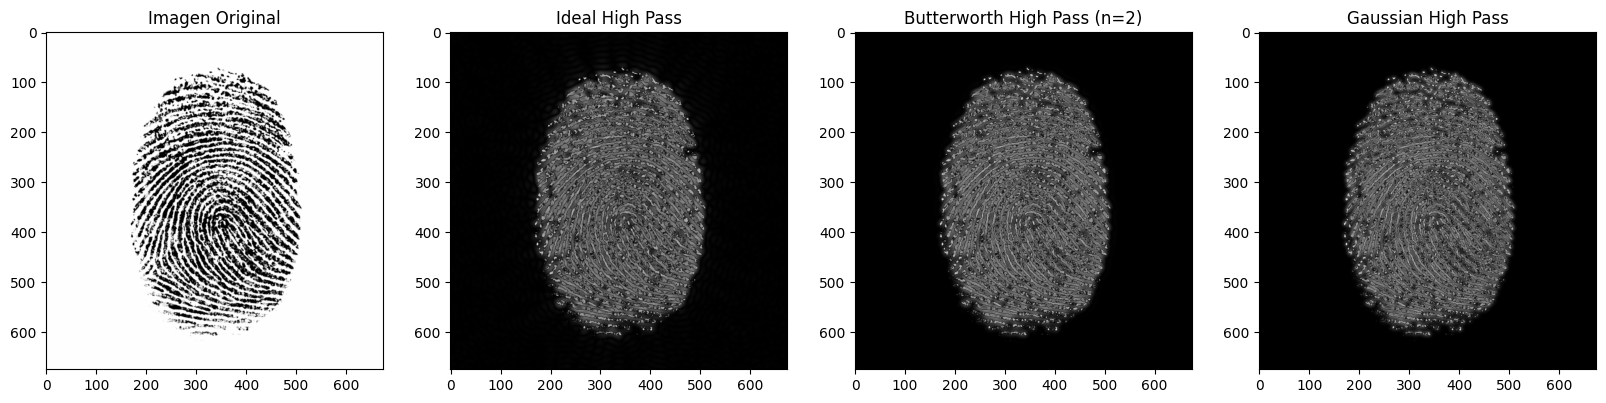

In [ ]:
# Cargar imagen en escala de grises
img = cv2.imread("data/huellas.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar Transformada de Fourier
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

# Figura para mostrar resultados
plt.figure(figsize=(20, 6))
plt.subplot(141), plt.imshow(img, cmap="gray"), plt.title("Imagen Original")

# Filtro Ideal
HP_Center = center * idealFilterHP(30, img.shape)
HP = np.fft.ifftshift(HP_Center)
inverse_HP = np.fft.ifft2(HP)
plt.subplot(142), plt.imshow(np.abs(inverse_HP), "gray"), plt.title("Ideal High Pass")

# Filtro Butterworth
HP_Center = center * butterworthHP(30, img.shape, 2)
HP = np.fft.ifftshift(HP_Center)
inverse_HP = np.fft.ifft2(HP)
plt.subplot(143), plt.imshow(np.abs(inverse_HP), "gray"), plt.title("Butterworth High Pass (n=2)")

# Filtro Gaussiano
HP_Center = center * gaussianHP(30, img.shape)
HP = np.fft.ifftshift(HP_Center)
inverse_HP = np.fft.ifft2(HP)
plt.subplot(144), plt.imshow(np.abs(inverse_HP), "gray"), plt.title("Gaussian High Pass")

# Mostrar resultados
plt.show()